# Aprendizado Ensemble e Florestas aleatórias

Se agregarmos as predições de um grupo de preditores (como classificadores ou regressores), iremos obter melhores predições do que com o melhor preditor individual. Um grupo de preditores é chamado de *ensemble* (agrupamento). Logo, essa técnica se chama *aprendizado emsemble* (1), e um algoritmo de aprendizado ensemble é chamado de *método ensemble*.

Por exemplo, pode-se treinar um grupo de classificadores de uma árvore de decisão, cada um com um subconjunto aleatório diferente do conjunto de treinamento. Para efetuar as predições, obtem-se as predições de todas as árvores individuais e, em seguida, prediz a classe que obtém mais votos. Esse agrupamento de árvores de decisão se chama *Floresta aleatória*.

Usa-se com frequência os métodos ensemble no fim de um projeto, para combinar preditores bons que já tenham sido criados e criar um ainda melhor.

<small>(1) O termo aprendizado ensemble também é conhecido como aprendizagem por agrupamento ou por agregação.</small>

## Classificadores de votação

Pode-se ter um classificador de regressão logística, um classificador SVM, um classificador de floresta aleatória, um classificador k-enésimo vizinho mais próximo, e talvez mais alguns, cada um com uma acurácia de 80%. Uma forma simples de criar um classificador ainda melhor é agrupar as predições de cada classificador e predizer a classe que obtém mais votos. Esse classificador de predições de votos majoritários se chama classificador *hard voting*.

**Soft voting**: classifica os dados de entrada com base nas probabilidades de todas as previsões feitas por diferentes classificadores.

**Hard voting**: classifica os dados de entrada com base na moda de todas as previsões feitas por diferentes classificadores.

Ainda que cada classificador seja um *weak learner* (aprendiz fraco), o que significa que é ligeiramente melhor que uma suposição ao acaso, o agrupamento ainda pode ser um *strong learn* (aprendiz forte) e atingir uma acurácia alta, desde que exista um número suficiente de aprendizes fracos e eles sejam bastante diversificados.

Os métodos ensemble funcionam melhor quando os preditores são tão independentes dos outros quanto possivel. Uma forma de obter classificadores diversos é treiná-los usando algoritmos bastante diferentes. Isso aumenta a chance de eles cometerem erros com tipos muito diferentes, não correlacionados, melhorando a acurácia do agrupamento.

### Criando um classificador de votação com Scikit-Learn

Criando um classificador de votação constituído por 3 classificadores diversos.

O dataset é o **Pima Indians Diabetes**. O objetivo é prever se um paciente desenvolverá ou não diabetes, com base em certas medidas de diagnóstico médico.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [3]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = pd.read_csv(url, names=colunas, skiprows=0, delimiter=',')
print(f'-----------Missing---------------')
print(f'Missing: {dataset.isnull().sum()}')
print(f'-----------Shape---------------')
print(f'Dimensões: {dataset.shape}')
dataset.head(10)

-----------Missing---------------
Missing: preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64
-----------Shape---------------
Dimensões: (768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
dataset.describe(include='all')

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset[
  ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
  ], dataset['class'], test_size=0.25, random_state=101)

In [6]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [7]:
voting_clf = VotingClassifier(
  estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
  voting='hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

Vamos analizar a acurácia de cada classificador no conjunto de testes:

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.7916666666666666
RandomForestClassifier 0.7760416666666666
SVC 0.7916666666666666
VotingClassifier 0.796875


O classificador de votação desbanca ligeiramente todos os classificadores individuais!

## Bagging e Pasting

Uma forma de obter um conjunto diversificado  de classificadores é utilizar algoritmos de treinamentos diferentes, como acima. Outra forma é usar o mesmo algoritmo de treinamento para todos os preditores e treiná-los com diferentes subconjuntos aléatórios do conjunto de treinamento.

Quando a amostragem é realizada com substituição, esse método chama-se *bagging*. Quando a amostragem é realizada sem substituição chama-se *pasting*.

A amostragem aleatória é chamada de *bootstrapping*. Em essência, bootstrapping é uma amostragem aleatória com substituição dos dados de treinamento disponíveis. Bagging (= agregação de bootstrap) é executá-lo muitas vezes e treinar um estimador para cada conjunto de dados bootstrap.

A função de agragação é normalmente uma *moda estatística* (ou seja, a predição mais frequente, como em um classificador de hard voting) para classificação ou a média para a regressão.

### Bagging e pasting no Scikit-Learn

Este código treina um conjunto de 500 classificadores da árvore de decisão. Cada classificador é treinado em 100 instâncias de treinamento submetidas a amostras aleatórias no conjunto de treinamento com substituição. Caso se queira usar o pasting, basta definir bootstrap = False. O parâmetro n_jobs informa à Scikit-Learn o número de núcleos da CPU a serem usados para  treinamento e para as predições (-1 informa para utilizar todos os núcleos disponíveis).

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
bag_clf = BaggingClassifier(
  DecisionTreeClassifier(), n_estimators=500,
  max_samples=100, bootstrap=True, n_jobs=-1
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(f'Acuracia: {accuracy_score(y_test, y_pred)}')

Acuracia: 0.7760416666666666


O BaggingClassifier executa automaticamento o *soft voting*  se o classificador-base conseguir estimar as probabilidades de classe (ou seja, se tiver um método predict_proba(), como é o caso das árvores de decisão).

### Distribuição de probabilidade

O método predict_proba aceita um único argumento que corresponde aos dados sobre os quais as probabilidades serão calculadas e retorna uma matriz de listas contendo as probabilidades de classe para os pontos de dados de entrada.

In [12]:
bag_clf_predict = bag_clf.predict_proba(X_test)
bag_clf_predict

array([[0.552, 0.448],
       [0.134, 0.866],
       [0.828, 0.172],
       [0.584, 0.416],
       [0.832, 0.168],
       [0.252, 0.748],
       [0.194, 0.806],
       [0.804, 0.196],
       [0.592, 0.408],
       [0.73 , 0.27 ],
       [0.99 , 0.01 ],
       [0.918, 0.082],
       [0.714, 0.286],
       [0.55 , 0.45 ],
       [0.74 , 0.26 ],
       [0.252, 0.748],
       [0.232, 0.768],
       [0.89 , 0.11 ],
       [0.512, 0.488],
       [0.984, 0.016],
       [0.764, 0.236],
       [0.694, 0.306],
       [0.408, 0.592],
       [0.644, 0.356],
       [0.836, 0.164],
       [0.166, 0.834],
       [0.938, 0.062],
       [0.54 , 0.46 ],
       [1.   , 0.   ],
       [0.456, 0.544],
       [0.254, 0.746],
       [0.488, 0.512],
       [0.566, 0.434],
       [0.544, 0.456],
       [0.844, 0.156],
       [0.898, 0.102],
       [0.624, 0.376],
       [0.366, 0.634],
       [0.218, 0.782],
       [0.926, 0.074],
       [0.918, 0.082],
       [0.508, 0.492],
       [0.906, 0.094],
       [0.4

In [13]:
bag_clf_predict = bag_clf.predict_proba(X_test)[:,1]

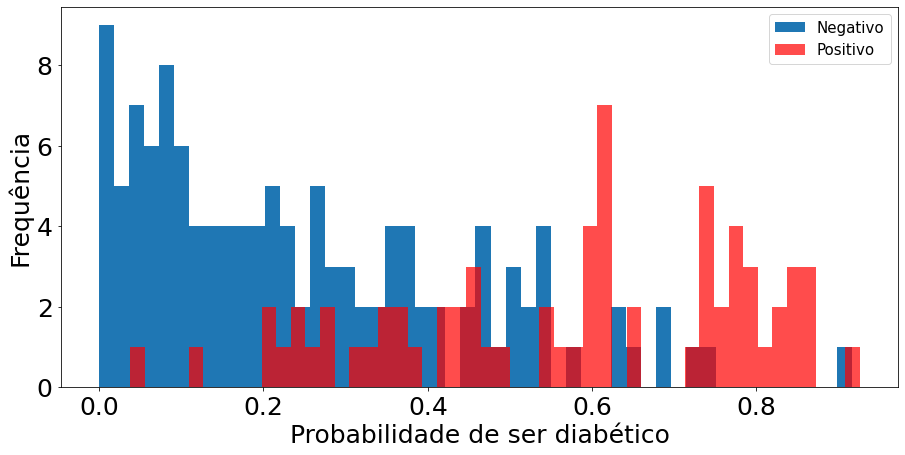

In [14]:
plt.figure(figsize=(15,7))
plt.hist(bag_clf_predict[y_test==0], bins=50, label='Negativo')
plt.hist(bag_clf_predict[y_test==1], bins=50, label='Positivo', alpha=0.7, color='r')
plt.xlabel('Probabilidade de ser diabético', fontsize=25)
plt.ylabel('Frequência', fontsize=25)
plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show()